In [269]:
from mat4py import loadmat
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from skimage.transform import resize, downscale_local_mean
data = loadmat('emnist-digits-150.mat')
images = data["dataset"]["DigitImage"]["images"]
labels = data["dataset"]["DigitImage"]["labels"]
number_of_data = len(images)
# number_of_data|
# np.array(images[1]).reshape(28,28).T
# labels

In [270]:
labled_data = {}
for i in range(10):
    labled_data[i] = []
for i in range(number_of_data):
    labled_data[labels[i][0]].append(np.array(images[i]).reshape(28,28).T)

# for j in range(len(labled_data[1])):
#     plt.imshow(labled_data[1][j])
#     plt.show()
# plt.subplot(1,2,1)
# plt.imshow(labled_data[1][6])   
# plt.axis("off")
# plt.subplot(1,2,2)
# plt.imshow(labled_data[6][7])   
# plt.axis("off")
best_index = {0:10, 1:12, 2:4, 3:5, 4:2, 5:8, 6:7, 7:4, 8:13, 9:1}


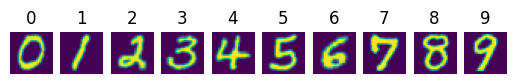

In [271]:
#plot all best index of images
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(labled_data[i][best_index[i]])
    plt.title(i)
    plt.axis("off")

In [273]:
labled_data_downscale = {}
for i in range(10):
    labled_data_downscale[i] = []
average_image = np.zeros((7,7))
for i in range(10):
    for j in range(len(labled_data[i])):
        new_image = downscale_local_mean(image=labled_data[i][j], factors=4)
        labled_data_downscale[i].append(new_image)
        average_image += new_image
average_image = average_image / 150
# average_image = average_image.mean()
# average_image

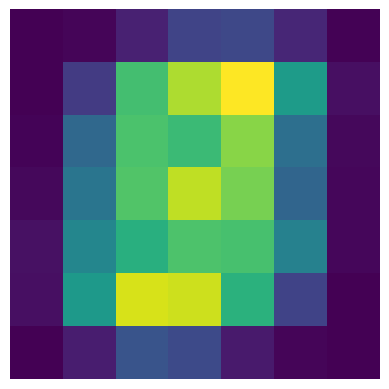

In [274]:
plt.imshow(average_image)
plt.axis("off")
plt.show()

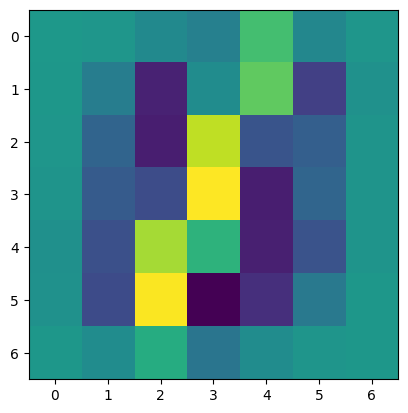

In [275]:
plt.imshow(labled_data_downscale[1][best_index[1]] - average_image)

In [276]:
# cut all the photos from the average 
for i in range(10):
    for j in range(len(labled_data[i])):
        labled_data_downscale[i][j] = labled_data_downscale[i][j] - average_image


In [277]:
def cosine(first_image, second_image):
    first_image_vector = first_image.flatten()
    second_image_vector = second_image.flatten()
    cosine_similarity = np.round(np.dot(first_image_vector, second_image_vector) / (np.linalg.norm(first_image_vector)*np.linalg.norm(second_image_vector)), 4)
    return (cosine_similarity + 1) / 2 
sample = labled_data_downscale[7][1]
for i in range(10):
    print(i, cosine(labled_data_downscale[i][best_index[i]], sample))
# plt.imshow(labled_data_downscale[1][4])
# plt.show()
# plt.imshow(labled_data_downscale[4][best_index[4]])
# plt.show()
# plt.imshow(labled_data_downscale[3][best_index[3]])

0 0.60885
1 0.3351
2 0.5927
3 0.5283
4 0.50865
5 0.4517
6 0.45495
7 0.90705
8 0.53545
9 0.681


In [278]:
def predict(similarities):
    consequesnces = []
    for i in range(10):
        i_similarity = similarities[:]
        for j in range(len(i_similarity)):
            if j<= 9:
                if j != i:
                    i_similarity[j] = 1 - i_similarity[j]
            if j == 10:
                if (i != 1 and i !=8 ):
                    i_similarity[j] = 1 - i_similarity[j]
            if j == 11:
                if (i != 5):
                    i_similarity[j] = 1 - i_similarity[j]
            if j == 12:
                if (i != 6):
                    i_similarity[j] = 1 - i_similarity[j]
            if j == 13:
                if (i != 9):
                    i_similarity[j] = 1 - i_similarity[j]
            if j == 14:
                if (i != 2):
                    i_similarity[j] = 1 - i_similarity[j]
        consequesnces.append(np.array(i_similarity).prod())
    return consequesnces.index(max(consequesnces))
counter = 0
# for j in range(len(labled_data_downscale[counter])):
#     similarities = []
#     for i in range(10):
#         similarity = cosine(labled_data_downscale[i][best_index[i]], labled_data_downscale[counter][j])
#         similarities.append(similarity)
    
#     result = predict(similarities)
#     print(counter, ":", result)
#     counter += 1

y_true = []
y_pred = []

for i in range(10):
    for j in range(len(labled_data_downscale[i])):
        similarities = []
        for k in range(10):
            similarity = cosine(labled_data_downscale[k][best_index[k]], labled_data_downscale[i][j])
            similarities.append(similarity)
        # similarities.append(cosine(labled_data_downscale[i][j], np.flipud(np.fliplr(labled_data_downscale[i][j]))))
        # similarities.append(cosine(np.fliplr(labled_data_downscale[i][j]), labled_data_downscale[2][best_index[2]]))
        # similarities.append(cosine(np.flipud(labled_data_downscale[i][j]), labled_data_downscale[9][best_index[9]]))
        # similarities.append(cosine(np.flipud(labled_data_downscale[i][j]), labled_data_downscale[6][best_index[6]]))
        # similarities.append(cosine(np.fliplr(labled_data_downscale[i][j]), labled_data_downscale[5][best_index[5]]))
        
        result = predict(similarities)
        
        y_pred.append(result)
        y_true.append(i)
        # print(i, ":", result)
    

In [279]:
from pretty_confusion_matrix import pp_matrix
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_pred=y_pred, y_true=y_true)
print(np.diag(cfm).sum())
cfm

81


array([[12,  0,  0,  0,  0,  0,  2,  0,  4,  0],
       [ 0, 12,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  5,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0, 11,  0,  3,  0,  0,  1,  3],
       [ 0,  2,  1,  0,  5,  0,  0,  0,  0,  4],
       [ 1,  2,  0,  2,  1,  6,  5,  3,  0,  0],
       [ 2,  1,  0,  0,  2,  0, 13,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  6,  0,  3],
       [ 0,  4,  0,  1,  1,  0,  0,  1,  4,  3],
       [ 0,  2,  0,  0,  0,  1,  0,  4,  0,  7]])

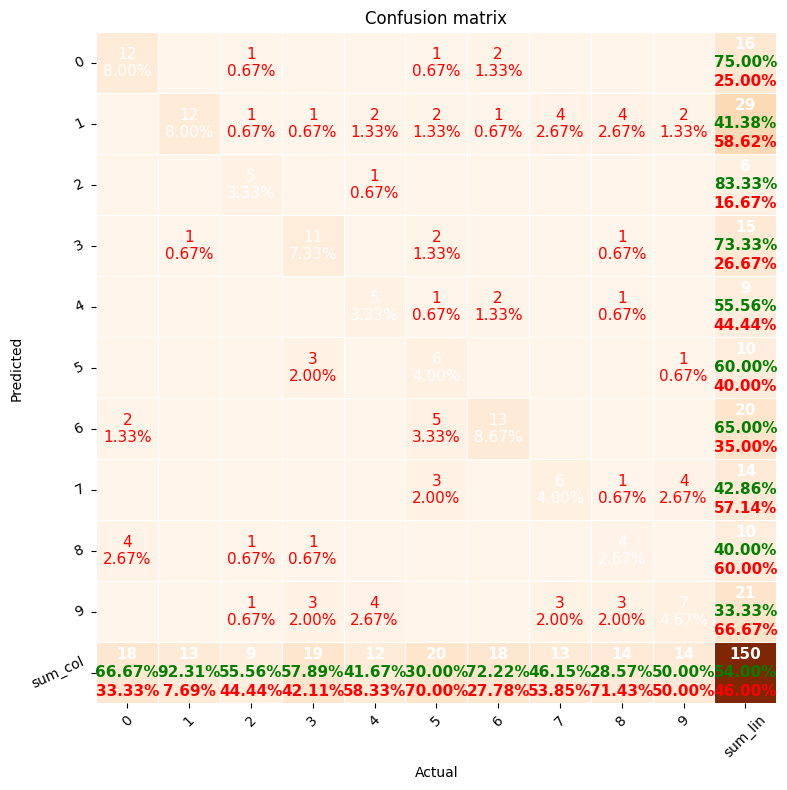

In [280]:
pp_matrix(pd.DataFrame(cfm), fmt=".1f")